
## Load the CSV Files


#####  Import the Pandas and Matplotlib libraries with the Pyplot module

In [1]:
# Add Matplotlib inline magic command

%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
# Declare variables that connect to the CSV files in the Resources folder
# Files to load

city_data_to_load = "Resources/city_data.csv"
ride_data_to_load = "Resources/ride_data.csv"



## Read each CSV file in Pandas.

In [3]:
# Read the city data file and store it in a pandas DataFrame.
city_data_df = pd.read_csv(city_data_to_load)
city_data_df.head(10)

,city,driver_count,type
0,Richardfort,38,Urban
1,Williamsstad,59,Urban
2,Port Angela,67,Urban
3,Rodneyfort,34,Urban
4,West Robert,39,Urban
5,West Anthony,70,Urban
6,West Angela,48,Urban
7,Martinezhaven,25,Urban
8,Karenberg,22,Urban
9,Barajasview,26,Urban


In [4]:
# Read the ride data file and store it in a pandas DataFrame.
ride_data_df = pd.read_csv(ride_data_to_load)
ride_data_df.head(10)

,city,date,fare,ride_id
0,Lake Jonathanshire,1/14/2018 10:14,13.83,5.739410e+12
1,South Michelleport,3/4/2018 18:24,30.24,2.343910e+12
2,Port Samanthamouth,2/24/2018 4:29,33.44,2.005070e+12
3,Rodneyfort,2/10/2018 23:22,23.44,5.149250e+12
4,South Jack,3/6/2018 4:28,34.58,3.908450e+12
5,South Latoya,3/11/2018 12:26,9.52,1.995000e+12
6,New Paulville,2/27/2018 11:17,43.25,7.932080e+11
7,Simpsonburgh,4/26/2018 0:43,35.98,1.119540e+11
8,South Karenland,1/8/2018 3:28,35.09,7.995620e+12
9,North Jasmine,3/9/2018 6:26,42.81,5.327640e+12




##  Explore the Data in Pandas before Merge



### Inspect the City Data DataFrame

In [5]:
# Get the columns and the rows that are not null.
# To get the name of each column and the number of rows that are not null, we can use the df.count() method.

city_data_df.count()

city            120
driver_count    120
type            120
dtype: int64

In [6]:
# to make sure there are no null values: Get the columns and the rows that are null.
city_data_df.isnull().sum()

city            0
driver_count    0
type            0
dtype: int64

In [7]:
# Get the data types of each column.
# To get the data types of each column, we use the dtypes on the DataFrame.

city_data_df.dtypes

city            object
driver_count     int64
type            object
dtype: object

In [8]:
# How many data points are there for each type of city. Use the sum() method on the city_data_df 
# Use the unique() method on a specific column,to return an array, or list, of all the unique values of that column

# Get the unique values of the column type of city.
city_data_df["type"].unique()

array(['Urban', 'Suburban', 'Rural'], dtype=object)

In [14]:
# To get the total_number of data points for the cities,eg. Urban:
# Use the sum() method on the city_data_df for the type column where the condition equals either Urban, Suburban, or Rural.

# Get the number of data points from the Urban cities.
sum(city_data_df["type"]=="Urban")
sum(city_data_df["type"]=="Suburban")
sum(city_data_df["type"]=="Rural")

18

### Inspect the Ride Data DataFrame

In [15]:
# Get the columns and the rows that are not null.
ride_data_df.count()

city       2375
date       2375
fare       2375
ride_id    2375
dtype: int64

In [16]:
# Get the columns and the rows that are not null.
ride_data_df.isnull().sum()

city       0
date       0
fare       0
ride_id    0
dtype: int64

In [17]:
# Get the data types of each column.
ride_data_df.dtypes

city        object
date        object
fare       float64
ride_id    float64
dtype: object



## Merge DataFrames

In [18]:
# Merge on a column with the same data, and the same column name, in both DataFrames.
# Merge Syntax: new_df = pd.merge(leftdf, rightdf, on=["column_leftdf", "column_rightdf"])

# Combine the data into a single dataset
pyber_data_df = pd.merge(ride_data_df, city_data_df, how="left", on=["city", "city"])

# Display the DataFrame
pyber_data_df.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,1/14/2018 10:14,13.83,5.739410e+12,5,Urban
1,South Michelleport,3/4/2018 18:24,30.24,2.343910e+12,72,Urban
2,Port Samanthamouth,2/24/2018 4:29,33.44,2.005070e+12,57,Urban
3,Rodneyfort,2/10/2018 23:22,23.44,5.149250e+12,34,Urban
4,South Jack,3/6/2018 4:28,34.58,3.908450e+12,46,Urban


######    Create a Bubble Chart that showcases the avg.fare vs the total num of rides with bubble size based on
#####          the average number of drivers for each city type: urban, suburban, and rural.
#####               For the bubble chart, we will need to plot the following:

#########    The average fare for each type of city on the y-axis
#########    The total number of rides for each type city on the x-axis
#########    Make the size of each marker, or bubble, correlate to the average number of drivers for each type of city
#########    Do the steps below to arrive at/before creating bubble chart



## Create DataFrames for Each Type of City

In [19]:
# Each new DF can be created by filtering the pyber_data_df DF, where the city type is equal to Urban, Suburban, or Rural.
# Create the Urban city DataFrame.

urban_cities_df = pyber_data_df[pyber_data_df["type"] == "Urban"]
urban_cities_df.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,1/14/2018 10:14,13.83,5.739410e+12,5,Urban
1,South Michelleport,3/4/2018 18:24,30.24,2.343910e+12,72,Urban
2,Port Samanthamouth,2/24/2018 4:29,33.44,2.005070e+12,57,Urban
3,Rodneyfort,2/10/2018 23:22,23.44,5.149250e+12,34,Urban
4,South Jack,3/6/2018 4:28,34.58,3.908450e+12,46,Urban


In [21]:
# Create the Suburban city DataFrame.

suburban_cities_df = pyber_data_df[pyber_data_df["type"] == "Suburban"]
suburban_cities_df.head()

,city,date,fare,ride_id,driver_count,type
1625,Barronchester,1/27/2018 3:08,27.79,6.653620e+12,11,Suburban
1626,East Kentstad,4/7/2018 19:44,18.75,6.575960e+12,20,Suburban
1627,Lake Omar,1/17/2018 21:33,21.71,9.669120e+11,22,Suburban
1628,Myersshire,2/27/2018 17:38,17.10,5.706770e+12,19,Suburban
1629,West Hannah,4/19/2018 1:06,37.78,2.273050e+12,12,Suburban


In [22]:
# Create the Rural city DataFrame.

rural_cities_df = pyber_data_df[pyber_data_df["type"] == "Rural"]
rural_cities_df.head()

,city,date,fare,ride_id,driver_count,type
2250,Randallchester,4/13/2018 11:13,43.22,1.076080e+12,9,Rural
2251,North Holly,2/2/2018 14:54,12.42,1.985260e+12,8,Rural
2252,Michaelberg,3/27/2018 18:27,54.85,4.421840e+12,6,Rural
2253,Lake Latoyabury,2/23/2018 21:12,47.90,3.269650e+12,2,Rural
2254,Lake Latoyabury,5/6/2018 8:57,51.80,4.018030e+12,2,Rural



## Get the Number of Rides for Each City Type

In [23]:
# To get the number of rides for each city by each type of city, we have to create a Series,
# where the index is the name of the city and the column is the number of rides for that city.

# Note:To create a Data Series with one of the columns in a DataFrame, we can use the groupby() function and 
# add the column inside the parentheses.

# Get the number of rides for urban cities.
urban_ride_count = urban_cities_df.groupby(["city"]).count()["ride_id"]
urban_ride_count.head()


city
Amandaburgh        18
Barajasview        22
Carriemouth        27
Christopherfurt    27
Deanville          19
Name: ride_id, dtype: int64

In [25]:
# Get the number of rides for Suburban cities.

suburban_ride_count = suburban_cities_df.groupby(["city"]).count()["ride_id"]
suburban_ride_count.head()

city
Barronchester    16
Bethanyland      18
Brandonfort      19
Colemanland      22
Davidfurt        17
Name: ride_id, dtype: int64

In [26]:
# Get the number of rides for rural cities.

rural_ride_count = rural_cities_df.groupby(["city"]).count()["ride_id"]
rural_ride_count.head()

city
Bradshawfurt      10
Garzaport          3
Harringtonfort     6
Jessicaport        6
Lake Jamie         6
Name: ride_id, dtype: int64


## Get the Average Fare for Each City Type

In [27]:
# Using the groupby() function, we can chain the mean() method to get the averages of the fare column.

# Get average fare for each city in the urban cities.
urban_avg_fare = urban_cities_df.groupby(["city"]).mean()["fare"]
urban_avg_fare.head()

city
Amandaburgh        24.641667
Barajasview        25.332273
Carriemouth        28.314444
Christopherfurt    24.501852
Deanville          25.842632
Name: fare, dtype: float64

In [30]:
# Get average fare for each city in the suburban cities.
suburban_avg_fare = suburban_cities_df.groupby(["city"]).mean()["fare"]
suburban_avg_fare.head()

city
Barronchester    36.422500
Bethanyland      32.956111
Brandonfort      35.437368
Colemanland      30.894545
Davidfurt        31.995882
Name: fare, dtype: float64

In [31]:
# Get average fare for each city in the rural cities.
rural_avg_fare = rural_cities_df.groupby(["city"]).mean()["fare"]
rural_avg_fare.head()

city
Bradshawfurt      40.064000
Garzaport         24.123333
Harringtonfort    33.470000
Jessicaport       36.013333
Lake Jamie        34.358333
Name: fare, dtype: float64


## Get the Average Number of Drivers for Each City Type

In [32]:
# Get the average number of drivers for each urban city.

urban_driver_count = urban_cities_df.groupby(["city"]).mean()["driver_count"]
urban_driver_count.head()

city
Amandaburgh        12
Barajasview        26
Carriemouth        52
Christopherfurt    41
Deanville          49
Name: driver_count, dtype: int64

In [33]:
# Get the average number of drivers for each suburban city.

suburban_driver_count = suburban_cities_df.groupby(["city"]).mean()["driver_count"]
suburban_driver_count.head()

city
Barronchester    11
Bethanyland      22
Brandonfort      10
Colemanland      23
Davidfurt        23
Name: driver_count, dtype: int64

In [34]:
# Get the average number of drivers for each rural city.

rural_driver_count = rural_cities_df.groupby(["city"]).mean()["driver_count"]
rural_driver_count.head()

city
Bradshawfurt      7
Garzaport         7
Harringtonfort    4
Jessicaport       1
Lake Jamie        4
Name: driver_count, dtype: int64


## Create Bubble Charts  -- Using MATLAB method

#### Create each scatter plot individually and add them all to one chart.

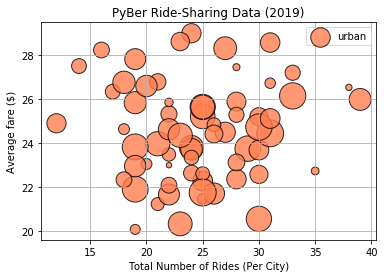

In [39]:
# Create the Urban Cities Scatter Plot/Bubble Chart

plt.scatter(urban_ride_count, urban_avg_fare,
            c="coral", 
            s=10*urban_driver_count, 
            edgecolor= "black",  linewidth= 1,
            alpha=0.8,  label="urban")

plt.title("PyBer Ride-Sharing Data (2019)")
plt.xlabel("Total Number of Rides (Per City)")
plt.ylabel("Average fare ($)")
plt.grid(True)
           
#Add a legend
plt.legend()

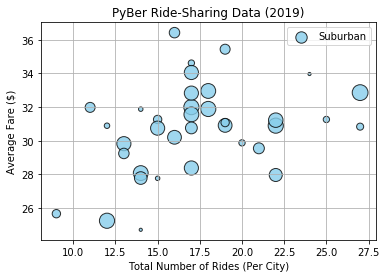

In [40]:
# Build the scatter plots for suburban cities.

plt.scatter(suburban_ride_count,
      suburban_avg_fare,
      s=10*suburban_driver_count, c="skyblue",
      edgecolor="black", linewidths=1,
      alpha=0.8, label="Suburban")
plt.title("PyBer Ride-Sharing Data (2019)")
plt.ylabel("Average Fare ($)")
plt.xlabel("Total Number of Rides (Per City)")
plt.grid(True)
# Add the legend.
plt.legend()

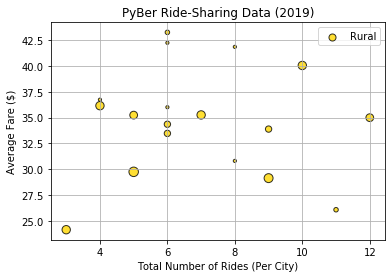

In [41]:
# Build the scatter plots for rural cities.

plt.scatter(rural_ride_count,
      rural_avg_fare,
      s=10*rural_driver_count, c="gold",
      edgecolor="black", linewidths=1,
      alpha=0.8, label="Rural")
plt.title("PyBer Ride-Sharing Data (2019)")
plt.ylabel("Average Fare ($)")
plt.xlabel("Total Number of Rides (Per City)")
plt.grid(True)
# Add the legend.
plt.legend()


##  Create a Bubble Chart for All Cities

##### Combinea all three scatter plot code blocks in one Jupyter Notebook cell.

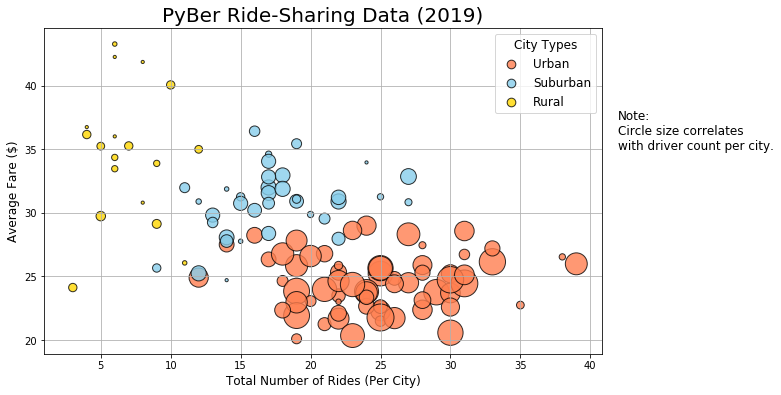

In [45]:
# Add the scatter charts for each type of city.

# Build the scatter charts for each city type.
plt.subplots(figsize=(10, 6))
plt.scatter(urban_ride_count, 
      urban_avg_fare, 
      s=10*urban_driver_count, c="coral", 
      edgecolor="black", linewidths=1, 
      alpha=0.8, label="Urban")

plt.scatter(suburban_ride_count, 
      suburban_avg_fare, 
      s=10*suburban_driver_count, c="skyblue", 
      edgecolor="black", linewidths=1, 
      alpha=0.8, label="Suburban")

plt.scatter(rural_ride_count, 
      rural_avg_fare, 
      s=10*rural_driver_count, c="gold", 
      edgecolor="black", linewidths=1, 
      alpha=0.8, label="Rural")

# Incorporate the other graph properties
plt.title("PyBer Ride-Sharing Data (2019)", fontsize=20)
plt.ylabel("Average Fare ($)", fontsize=12)
plt.xlabel("Total Number of Rides (Per City)", fontsize=12)
plt.grid(True)

# Create a legend
lgnd = plt.legend(fontsize="12", mode="Expanded",
         scatterpoints=1, loc="best", title="City Types")
lgnd.legendHandles[0]._sizes = [75]
lgnd.legendHandles[1]._sizes = [75]
lgnd.legendHandles[2]._sizes = [75]
lgnd.get_title().set_fontsize(12)

# Incorporate a text label/note about circle size.
plt.text(42, 35, "Note:\nCircle size correlates\nwith driver count per city.", fontsize="12")

# Save the figure.
plt.savefig("Analysis/Fig1.png")

# Show the plot
plt.show()